# Implementing Modified Winner Code on OCR Dataset; No. Hidden Layers = 1, instead of 3 on the best code.

In [77]:
# Set up imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [78]:
def make_output(letter):
    """Convert a capital letter into the a binary expression
       to be used as output of the NN"""
    output= [ float(c) for c in "{:05b}".format(ord(letter)-65) ]
    return output

# Read OCR dataset
dataset = pd.read_csv("letter-recognition.txt", header=None).values

# Generate output
output= np.array([ make_output(c) for c in dataset[:,0] ])

# Stack output to data
# dataset= np.hstack( (dataset,output) )

# Delete first column (letter)
dataset= np.delete(dataset,0,1) 

# Convert to float (required by tensorflow)
dataset= dataset.astype(float)

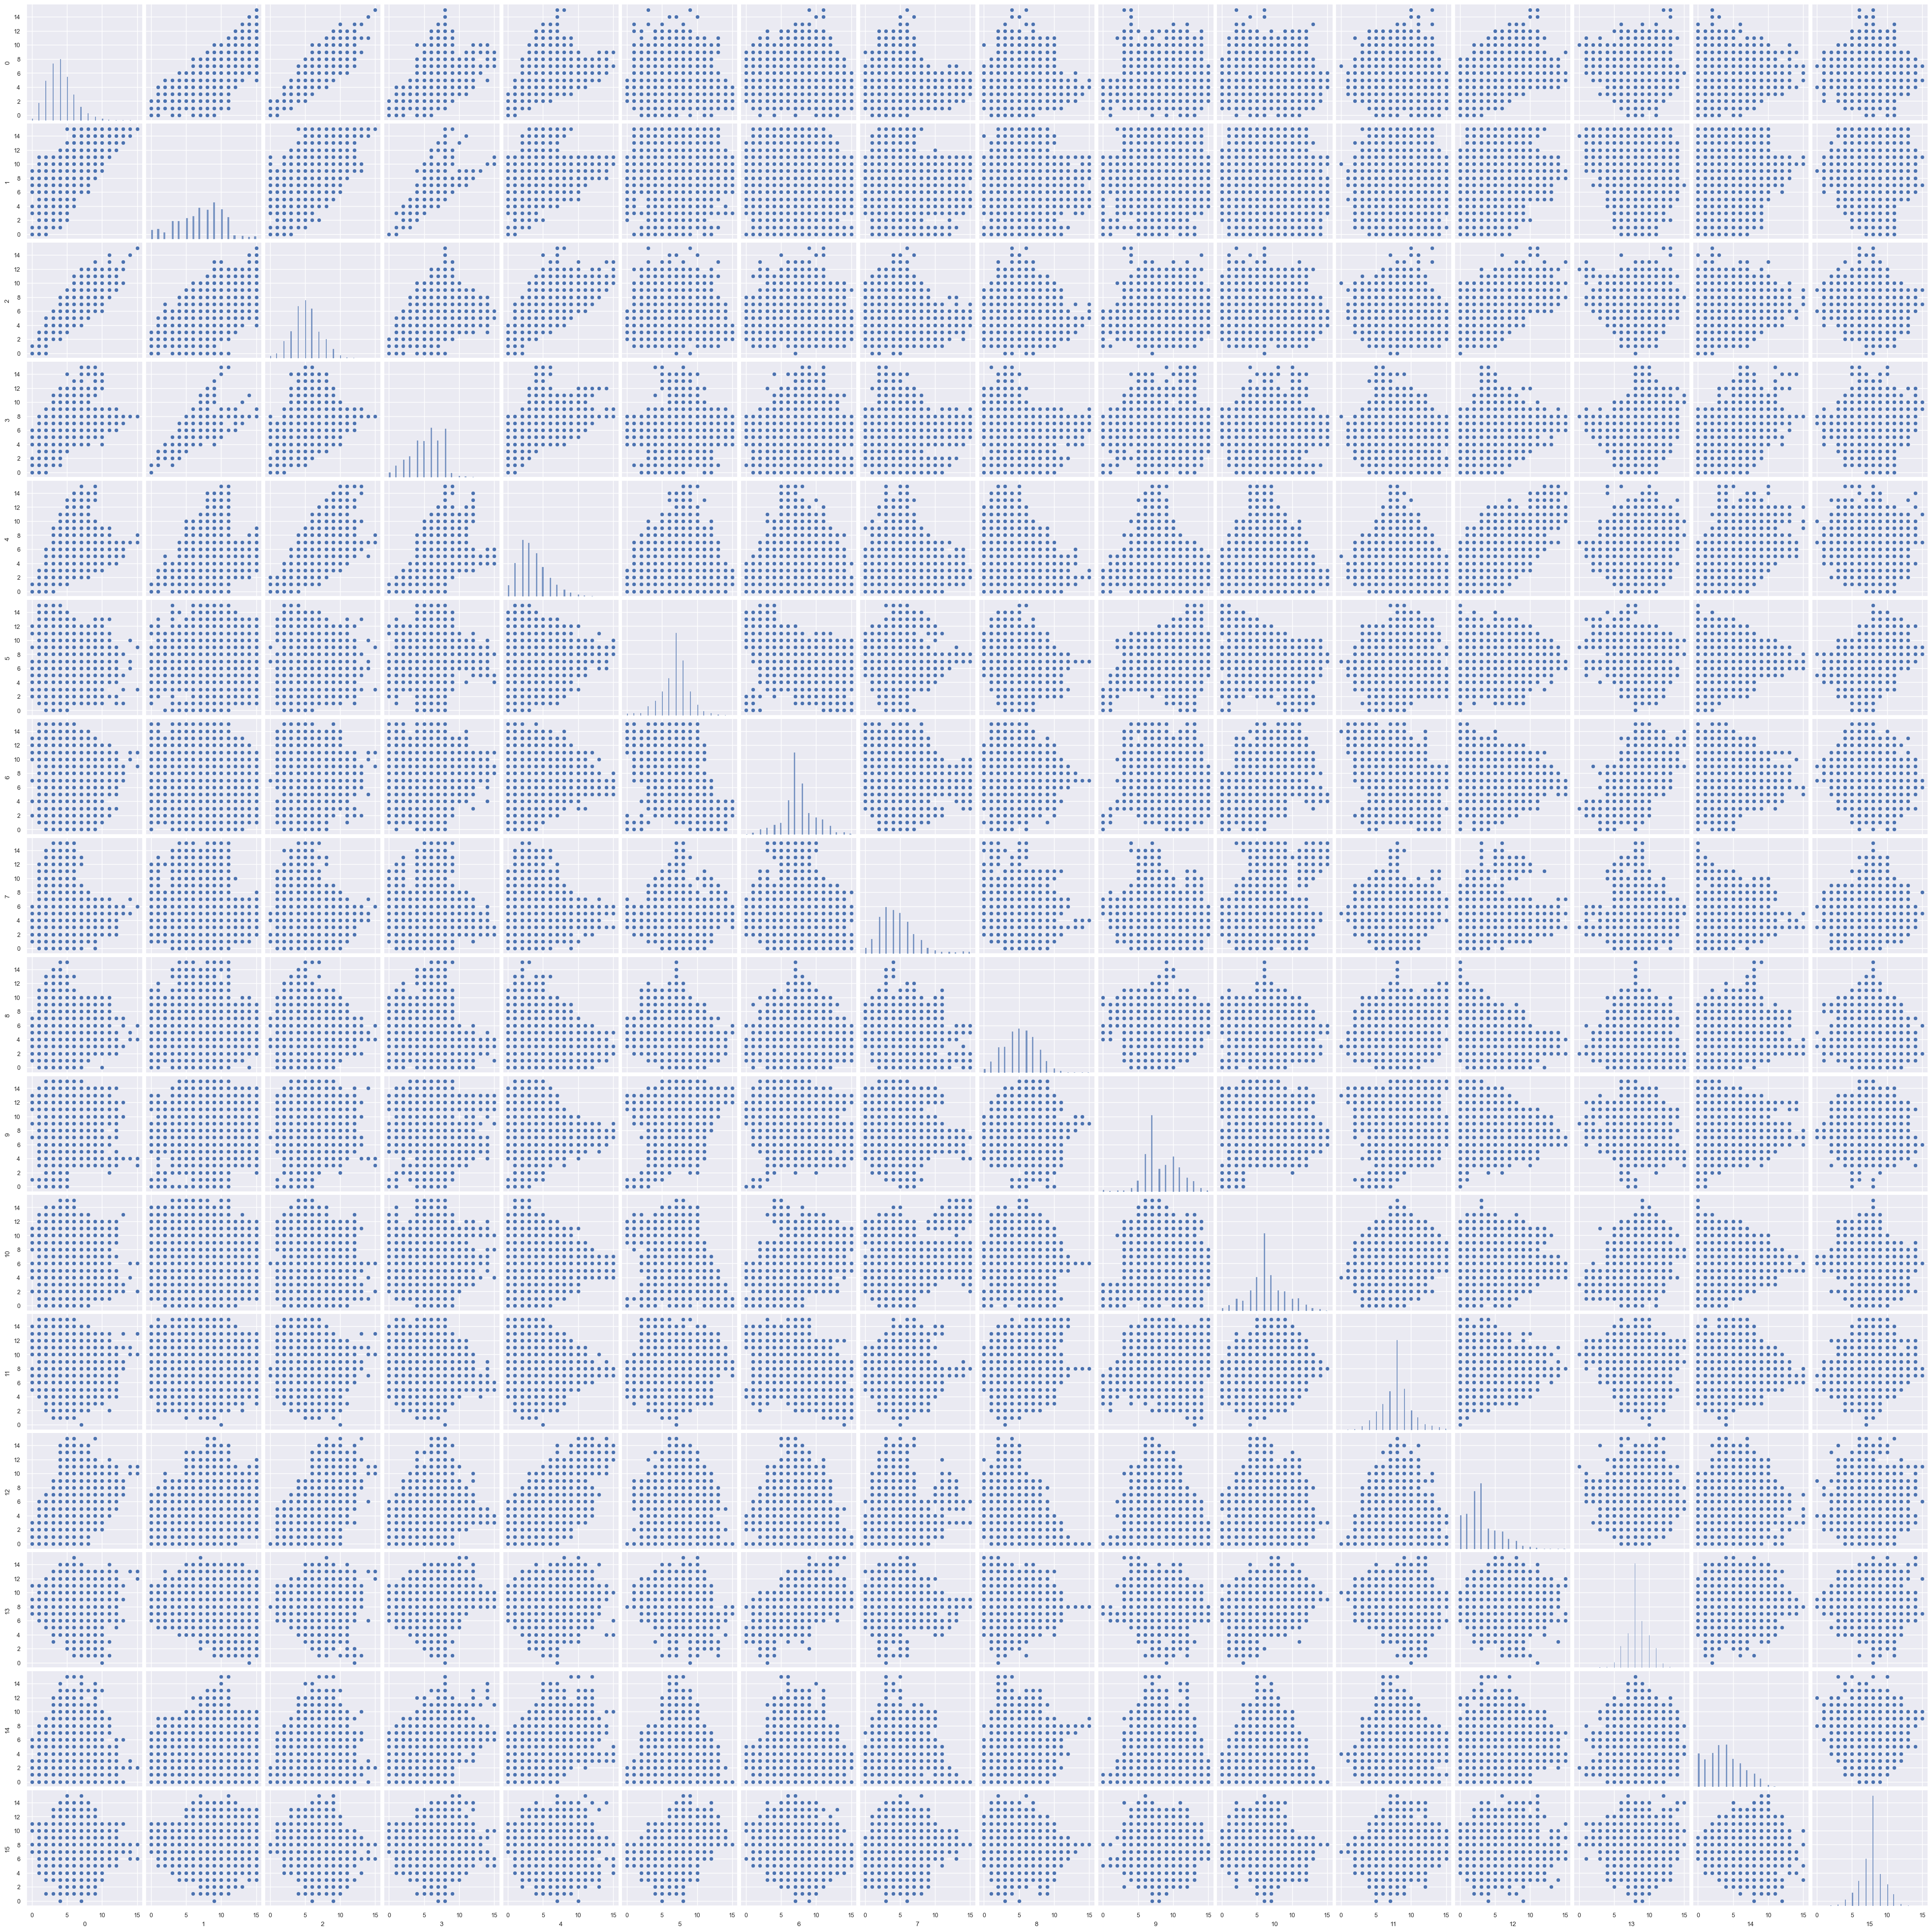

In [79]:
# Create a pairplot
df = pd.DataFrame(dataset)
sns.pairplot(df)
p= plt.show()

In [80]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(dataset, output, 
                                                test_size=0.3, 
                                                random_state=2)

print("Training dataset size: ", len(trainX))
print("Test dataset size: ", len(testX))

Training dataset size:  14000
Test dataset size:  6000


In [88]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(10)
my_NN = Sequential() # create model

# First layer, set the input_dim to the number of features
my_NN.add(Dense(5, input_dim=16, activation='relu')) # hidden layer


# Output layer
my_NN.add(Dense(5, activation='sigmoid')) # output layer

# Compile and define the loss function
my_NN.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [89]:
train_loss= []
train_acc= []
test_loss= []
test_acc= []

# Iterate for batches of epochs and collect status for train and test
for step in range(100):
    if step%10==0:
        print("Batch ",step)
    
    # verbose=0 suppresses the file writing message
    my_NN_fitted = my_NN.fit(trainX, trainy, epochs=1, 
                             verbose=0, batch_size=trainX.shape[0])
    
    # Collect performance information for train and test
    perf= my_NN.evaluate(trainX, trainy, verbose=0)
    train_loss.append(perf[0])
    train_acc.append(perf[1])
    
    perf= my_NN.evaluate(testX, testy, verbose=0)
    test_loss.append(perf[0])
    test_acc.append(perf[1])

Batch  0
Batch  10
Batch  20
Batch  30
Batch  40
Batch  50
Batch  60
Batch  70
Batch  80
Batch  90


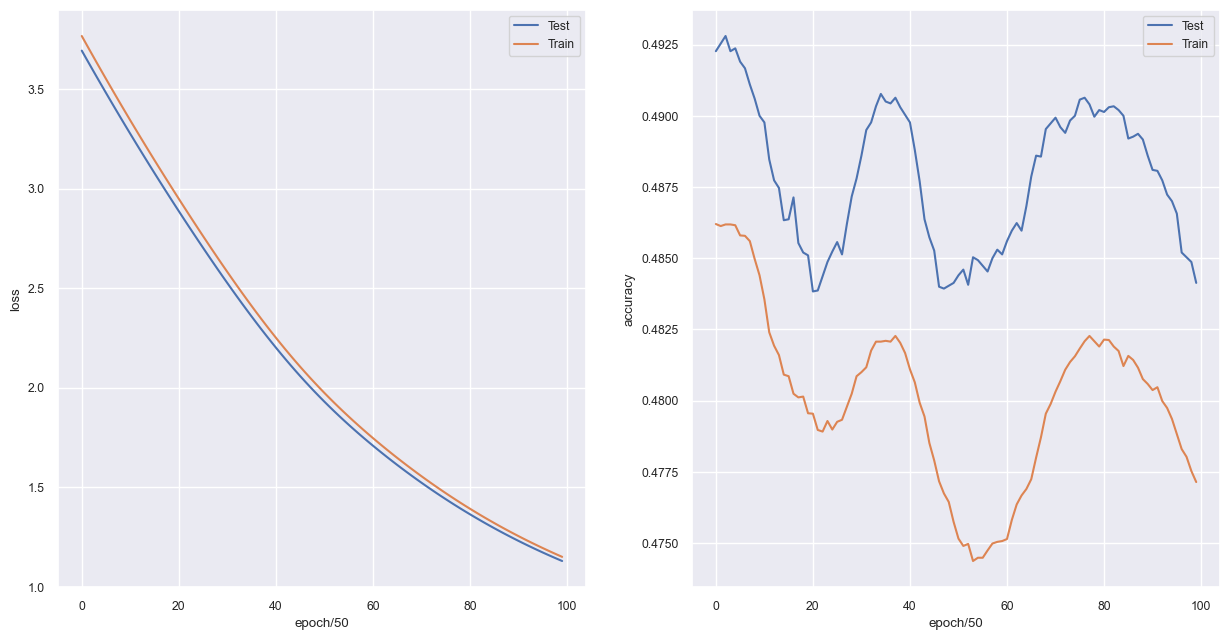

In [90]:
fig = plt.figure(frameon=False)
fig.set_size_inches(15,7.5)

# loss
plt.subplot(1,2,1)
plt.xlabel("epoch/50")
plt.ylabel("loss")
plt.plot(test_loss, label="Test")
plt.plot(train_loss, label="Train")
plt.legend()

# accuracy
plt.subplot(1,2,2)
plt.xlabel("epoch/50")
plt.ylabel("accuracy")
plt.plot(test_acc, label="Test")
plt.plot(train_acc, label="Train")
plt.legend()

p= plt.show()

In [95]:
# Predict output for test dataset
NN_out= my_NN.predict(testX, verbose=0)

# Function to decode output
def to_letter_code(bin_out):
    """Convert binary encoding output into a letter code"""
    rounded= ""
    for val in bin_out:
        rounded= rounded+str(int(round(val)))
    
#     return chr(int(rounded,2)+65)
    return int(rounded,2)
    
total= 0
correct= 0
for req,pred in zip(testy,NN_out):
    if to_letter_code(req)==to_letter_code(pred):
        correct+=1
    total+=1

print("Total:  ", total)
print("Correct: {:d} ({:.2f}%)".format(correct,100.*correct/total))

Total:   6000
Correct: 226 (3.77%)


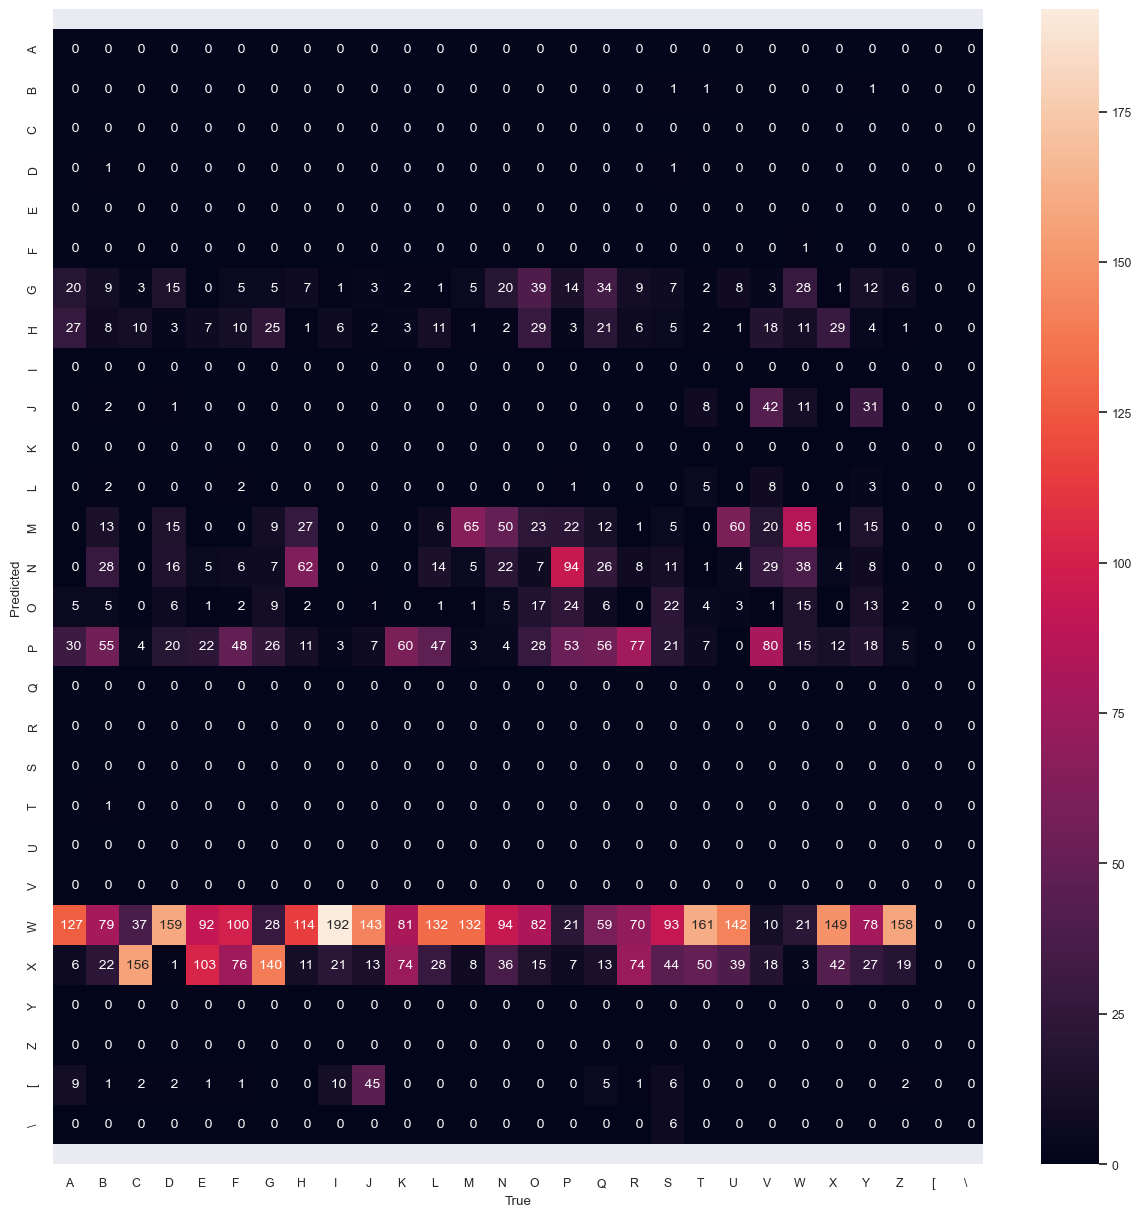

In [97]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate list of true-predicted letter codes
true= [to_letter_code(val) for val in testy]
pred= [to_letter_code(val) for val in NN_out]

# Generate confusion matrix
CM= confusion_matrix(pred,true)

# Plot heatmap
df_cm = pd.DataFrame(CM, range(28), range(28))
t_labels= [ chr(val+65) for val in range(0,28)]

plt.figure(figsize=(15,15))

sn.set(font_scale=0.8) # for label size
HM= sn.heatmap(df_cm, annot=True, annot_kws={"size":10}, fmt="4d")
HM.set_yticklabels(t_labels)
HM.set_xticklabels(t_labels)

# Patch to avoid cut in top/bottom; see https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [98]:
from sklearn.metrics import mean_absolute_error as mae

mae(true, pred)

9.519666666666666

In [99]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(true, pred)) 

11.586457612229893

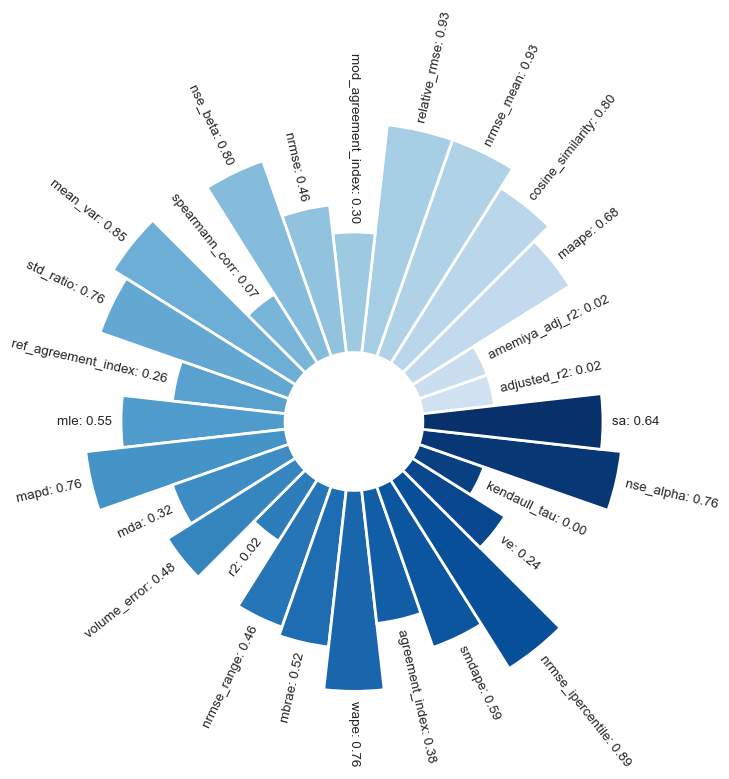

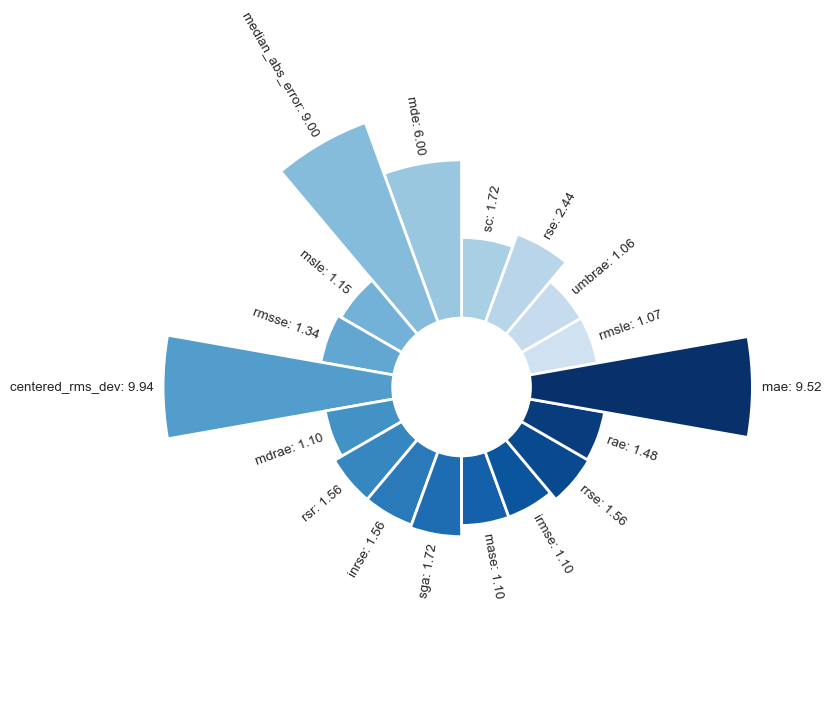

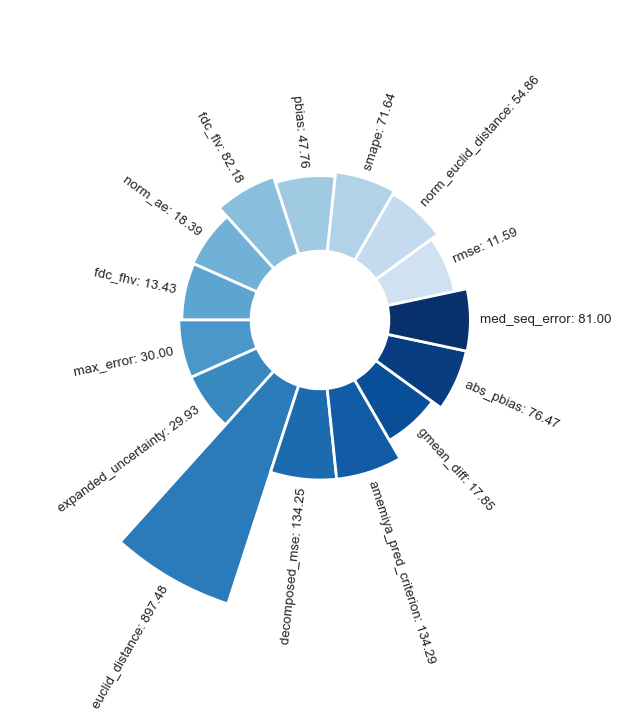

In [100]:
import numpy as np
from SeqMetrics import RegressionMetrics, plot_metrics

er = RegressionMetrics(true, pred)

plot_metrics(er.calculate_all(),  color="Blues")

In [101]:
import numpy as np


#calculate the correlation between the two arrays
np.corrcoef(true, pred)

array([[ 1.        , -0.14496112],
       [-0.14496112,  1.        ]])